<a href="https://colab.research.google.com/github/tomasallemand/Coderhouse_DS_entregas/blob/main/SegundaEntrega%2BAllemand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ABSTRACT

El estudio de la democracia como sistema de gobierno es fundamental para comprender y mejorar el desempeño de nuestras sociedades modernas, al menos en las sociedades que comparten los valores occidentales.

En este sentido intentaremos comprender qué fundamentos hay por detras de las percepciones que cada uno de los ciudadanos tiene sobre la democracia, intentando realizar un modelo que nos permita predecir cuando un ciudadano podría tener una percepción negativa de este sistema de gobierno.

**Motivación**: Es sumamente relevante conocer también la perspectiva y conformidad de los usuarios de este sistema: la ciudadanía. Esto adquiere aún más relevancia a la luz de las experiencias antidemocrácticas vividas en el siglo XX (al menos en Europa y Sudamérica) que dieron lugar a regímenes autoritarios y violentos, con consecuencias trágicas, y conocer qué indicadores pueden ser indicio de tendencias similares.

**Audiencia**: Este trabajo intenta dar cuenta de qué variables influyen en la percepción que tiene una persona de la democracia, por lo cual está orientada a cualquier persona que quiera comprender esta forma de gobierno.

#OBJETIVO
Teniendo en cuenta el contexto mencionado previamente, se intentará descubrir qué variables hay por detrás de la percepción que tienen las personas acerca de la democracia, para así hacer una estimación de las percepciones que distintas personas tienen acerca del sistema, aún sin tener el dato de su percepción de la democracia específicamente.

En términos concretos, se intentará encontrar qué variables explican la variable "Q250: Importance of democracy".

#HIPÓTESIS PRINCIPAL:
La valoración que una persona le asigna a la democracia como sistema de gobierno (variable dependiente) está influenciada por su percepción sobre el ordenamiento social, político y económico de su entorno. Específicamente, factores como los niveles de corrupción percibidos, los resultados económicos obtenidos bajo este sistema de gobierno en su país, y la valoración personal de otras instituciones alternativas, como el ejército, afectan su opinión sobre la democracia (variables independientes).

#CONTEXTO COMERCIAL
Una consultora quiere conocer el porcentaje de población que comparte ideas poco democráticas o autoritarias en una sociedad, independientemente de variaciones contextuales que favorezcan la proliferación temporal de este tipo de ideas.

Si bien las ideas antidemocráticas tienden a proliferar en contextos adversos de recesión económica o desaceleración del crecimiento (como cuestionamiento de la capacidad de este sistema de arrojar resultados), ello se trata de un patrón a nivel macro y puramente coyuntural.

En este sentido, se busca analizar qué variables micro tienden a fundamentar posturas autoritarias en los individuos, que puedan persistir independientemente de las variaciones contextuales y el devenir económico de una sociedad.

#PROBLEMA COMERCIAL

¿De qué depende que una persona valore positivamente la democracia como sistema de gobierno?

¿Cuales son los factores más importantes que explican que una persona esté disconforme con este régimen?

#CONTEXTO ANALÍTICO
El dataset a utilizar se llama "World Value Surveys. Wave 7. v5.0" y tal como su nombre lo indica, trata de una encuesta de más de 200 preguntas sobre la percepción de diferentes temas sociopolíticos y económicos de las personas entrevistadas, tanto en términos objetivos (por ejemplo edad o ingresos) o bien subjetivos (por ejemplo, percepción de inseguridad). Se trata de variables cualitativas que han sido codificadas en el dataset como cuantitativas discretas.

A su vez, cada columna fue codificada como Q (question) y un número que representa el orden de esa pregunta.

Posee 295 columnas y han respondido 1003 personas en total

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
import plotly.express as px

In [ ]:
df=pd.read_csv('/content/WVS_FINAL_LIMPIO_7_v5.0.csv',delimiter=";")

In [ ]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q282,Q283,Q284,Q285,Q286,Q287,Q288,Q288R,Q289,Q290
0,1,2,4,4,1,4,1,2,1,1,...,-3,-5,1,1,2,3,5,2,1,32001
1,1,2,1,2,2,4,2,1,2,1,...,-3,4,2,1,-2,3,3,1,0,32001
2,1,1,1,2,1,1,1,2,2,2,...,-3,7,2,1,-2,3,5,2,1,32001
3,1,1,1,2,2,1,1,2,2,1,...,3,4,2,2,-2,3,7,2,1,32001
4,1,1,1,3,1,3,1,2,2,1,...,-3,4,2,1,4,3,4,2,1,32001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,1,1,3,3,2,2,1,1,2,1,...,7,4,2,2,2,3,5,2,1,32001
999,1,1,3,3,2,2,1,1,1,1,...,0,4,2,1,4,4,5,2,1,32002
1000,1,2,3,2,2,4,1,1,1,1,...,-5,-5,2,2,-2,3,7,2,1,32001
1001,2,1,3,3,1,3,2,1,2,1,...,-5,-5,1,1,2,3,5,2,1,32001


In [ ]:
# Lista de columnas repetidas
columns_to_drop = ['Q34_3','Q33_3','Q35_3',]

# Eliminar las columnas
df = df.drop(columns=columns_to_drop)

# Remocion de nulos

Al ser una encuesta, los valores nulos están cargados como valores negativos. Por ende, para remover los nulos, debemos tratar a los valores negativos.

La opción de eliminar todos los negativos del DataFrame nos deja únicamente con 23 filas de las 1003 del dataset original, lo cual nos lleva a descartar esa opción.

Sin embargo, al reducir la dimensionalidad del dataset, podremos contar con la posibilidad de dejar únicamente las variables relevantes para la explicación de "Y" (Q250 = Importance of Democracy). Así podremos eliminar los nulos del dataset sin perder demasiada información.

Para saber con cuáles variables quedarnos para nuestro modelo, haremos en primer lugar un análisis de correlación para saber qué variables explican mejor el comportamiento de "Y".

Q250    1.000000
Q251    0.356080
Q243    0.309428
Q249    0.262976
Q112    0.232325
Q237    0.226643
Q197    0.211022
Q244    0.200042
Q127    0.170030
Q31     0.169400
Q77     0.157424
Name: Q250, dtype: float64


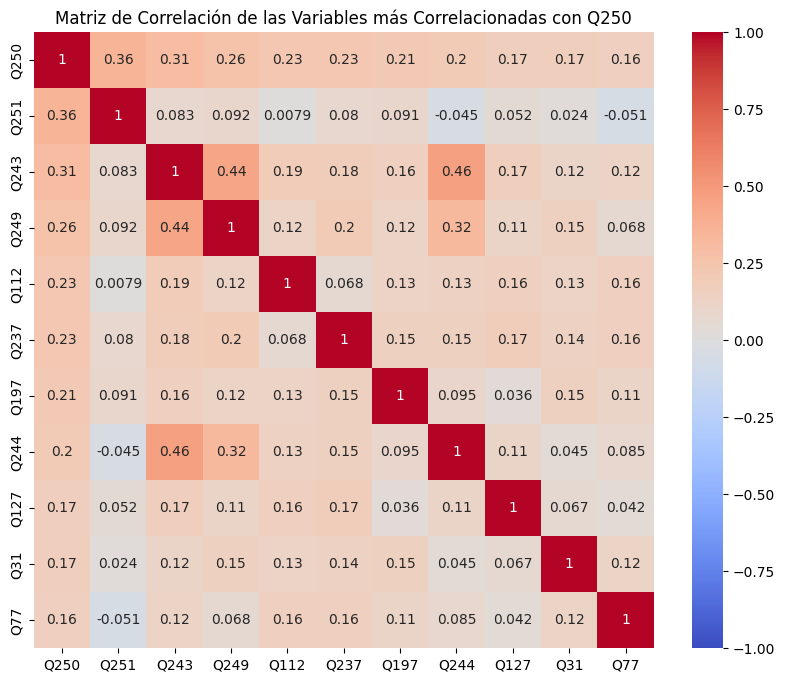

In [ ]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Mostrar la correlación de todas las variables con respecto a 'Q250'
correlacion_q250 = corr_matrix['Q250'].sort_values(ascending=False)

# Mostrar las 10 variables más correlacionadas con 'Q250'
top_10_correlacion = correlacion_q250.head(11)  # Incluyendo 'Q250' en sí mismo
print(top_10_correlacion)

# Visualizar la matriz de correlación de las variables más correlacionadas
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_10_correlacion.index].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de las Variables más Correlacionadas con Q250')
plt.show()

De las 10 variables con mayor nivel de correlación respecto de "Y", las que poseen una correlación lógica esperada a la hora de explicar la importancia que las personas dan a la democracia (para evitar caer en correlaciones espurias) son:

- Q243: Democracy: People choose their leaders in free elections
- Q249: Democracy: Women have the same rights as men
- Q237: Political system: Having the army rule (relación inversa).
- Q197: Government has the right: Monitor all e-mails and any other information exchanged on the Internet
- Q127: Immigration in your country: Helps poor people establish new lives
- Q112: Perceptions of corruption in the country

In [ ]:
df.shape

(1003, 292)

In [ ]:
# Lista de las columnas más correlacionadas con Q250
columnas_correlacionadas = ['Q250', 'Q243', 'Q249', 'Q112', 'Q237', 'Q197', 'Q127','Q262']

# Dejamos otras variables relevantes para revisar en el EDA (Q262 = Edad, Q240 = autopercepción izquierda-derecha, )

# Crear un nuevo dataframe con sólo estas columnas
df_reducido = df[columnas_correlacionadas]

# Mostrar las primeras filas del nuevo dataframe
df_reducido.head()

,Q250,Q243,Q249,Q112,Q237,Q197,Q127,Q262
0,10,10,10,10,4,4,1,50
1,10,10,10,10,4,3,2,34
2,10,10,10,10,4,4,2,35
3,10,10,10,10,4,-1,2,71
4,10,10,10,10,4,4,2,37


In [ ]:
df_reducido.columns

Index(['Q250', 'Q243', 'Q249', 'Q112', 'Q237', 'Q197', 'Q127', 'Q262'], dtype='object')

In [ ]:
df_reducido.shape

(1003, 8)

In [ ]:
# Calcula la proporción de valores negativos en términos porcentuales por columna
negatives_percentage = df_reducido.apply(lambda x: (x < 0).sum() / len(x) * 100)

# Muestra el porcentaje de valores negativos por columna
print("Porcentaje de valores negativos por columna:")
print(negatives_percentage)

Porcentaje de valores negativos por columna:
Q250    1.395813
Q243    1.395813
Q249    1.994018
Q112    0.598205
Q237    6.181456
Q197    4.386839
Q127    4.087737
Q262    0.000000
dtype: float64


In [ ]:
# Reemplazar valores negativos con NaN
df_reducido = df_reducido.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x < 0 else x)

# Eliminar filas con valores nulos
df_reducido = df_reducido.dropna()

# Verificar que no hay valores negativos ni nulos
print(df_reducido.isnull().sum().sum())  # Debe ser 0
print((df_reducido.select_dtypes(include=[np.number]) < 0).sum().sum())  # Debe ser 0

0
0


In [ ]:
df_reducido.shape

(849, 8)

#**Exploratory Data Analysis**

# **Q262: Edad**

In [ ]:
px.histogram(df_reducido,x='Q262',title='Edad')

Podemos ver que hay cierto sesgo en la encuesta, donde gran parte de los participantes son más jóvenes. Habría que revisar si esto implica algún tipo de sesgo dado que diferentes fuentes fundamentan la existencia de diferencias ideológicas muy marcadas en función de los diferentes grupos etarios.

#Veamos ahora la distribución de la valoración de la democracia como sistema de gobierno, es decir nuestra variable target (Q250):

In [ ]:
df_limpio = df_reducido.rename(columns={'Q250':'Importance_Democracy','Q243':'Trust_leaders','Q249':'Women_Man_EqualRights','Q112':'Corruption_Perception','Q237':'Army_Rule','Q197':'Government_rights','Q127':'Poor_inmigration','Q262':'Age'})

In [ ]:
df_limpio.head()

,Importance_Democracy,Trust_leaders,Women_Man_EqualRights,Corruption_Perception,Army_Rule,Government_rights,Poor_inmigration,Age
0,10.0,10.0,10.0,10.0,4.0,4.0,1.0,50
1,10.0,10.0,10.0,10.0,4.0,3.0,2.0,34
2,10.0,10.0,10.0,10.0,4.0,4.0,2.0,35
4,10.0,10.0,10.0,10.0,4.0,4.0,2.0,37
5,10.0,10.0,10.0,10.0,3.0,4.0,2.0,58


In [ ]:
px.histogram(df_limpio,x='Importance_Democracy',title='Valoración de la democracia como sistema de gobierno')

La mayoría de las personas consideran que la democracia es sumamente importante como sistema de gobierno.

In [ ]:
# Crear el gráfico de cajas sin modificar los datos originales
fig = px.box(df_limpio, x='Army_Rule', y='Importance_Democracy', title='Democracia vs. Gobierno militar',
             category_orders={'Army_Rule': [1, 2, 3, 4],
                              'Importance_Democracy': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             labels={'Army_Rule': 'Gobierno militar', 'Importance_Democracy': 'Democracia'})

# Invertir el eje Y
fig.update_yaxes(categoryorder='array', categoryarray=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Mostrar el gráfico
fig.show()

Si agrupamos grupos de personas de acuerdon con su grado de aceptación de un posible gobierno militar, en el cual las personas del grupo 1 (army rule) consideran que sería muy buen gobierno, y las personas del grupo 4 (quienes consideran que sería muy malo) y sus valores intermedios, podemos ver que las personas que respondieron que el gobierno militar sería muy buen gobierno o simplemente un buen gobierno, tienen una mayor dispersión acerca de su concepción de la democracia. Mientras que quienes consideran que sería "malo" o "muy malo" tener un gobierno militar, concentran sus percepciones de la democracia como un sistema de gobierno totalmente importante.

In [ ]:
# Crear el gráfico de cajas sin modificar los datos originales
fig = px.box(df_limpio, x='Women_Man_EqualRights', y='Importance_Democracy', title='Géneros vs. Importancia de la democracia')

# Mostrar el gráfico
fig.show()

Quienes comprenden la importancia de reconocer iguales derechos para ambos sexos, apoyan en un sentido mucho más homogéneo un régimen democrático. En contrapartida, quienes están en contra de la igualdad de género, tienen visiones más heterogéneas y dispersas de la democracia.

In [ ]:
# Crear el gráfico de cajas sin modificar los datos originales
fig = px.box(df_limpio, x='Trust_leaders', y='Importance_Democracy', title='Elecciones libres y democracia',
             category_orders={'Trust_leaders': [1, 2, 3, 4,5,6,7,8,9,10],
                              'Importance_Democracy': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             labels={'Trust_leaders': 'Elecciones libres', 'Importance_Democracy': 'Democracia'})

# Invertir el eje Y
fig.update_yaxes(categoryorder='array', categoryarray=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Mostrar el gráfico
fig.show()

# Modelado

# Split train test

In [ ]:
# Definiéndo la "y" o "target"
x=df_reducido.drop(['Q250'], axis=1)
y=df_reducido.Q250

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y)

In [ ]:
#Tamaño de x e y train:

In [ ]:
print(X_train.shape,y_train.shape)

(636, 7) (636,)


In [ ]:
#Tamaño de x e y test:

In [ ]:
print(X_test.shape,y_test.shape)

(213, 7) (213,)


# Seleccion de modelos (Hiperparametros)

1. KNN K=3 con todas
2. KNN K=5 con todas

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
modelo_1=KNN(3)
modelo_2=KNN(5)

In [ ]:
print(y_train.isnull().sum())

0


In [ ]:
print(y_test.isnull().sum())

0


In [ ]:
cross_val_score(modelo_1,X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



array([0.5       , 0.47244094, 0.50393701, 0.47244094, 0.51181102])

In [ ]:
cross_val_score(modelo_2,X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



array([0.5546875 , 0.48818898, 0.51181102, 0.48031496, 0.49606299])

**Promedios del score del modelo 1 y 2:**

In [ ]:
#modelo 1:
cross_val_score(modelo_1,X_train,y_train).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



0.4921259842519685

In [ ]:
#modelo 2:
cross_val_score(modelo_2,X_train,y_train).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



0.5062130905511811

**Nos quedamos con el modelo 2 (KNN = 5)**

#FEATURE SELECTION
3. Knn con k=5 y 4 variables elegidas con foward
4. Knn con k=5 y 5 variables elegidas con foward


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
#Libreria que me permite automatizar la feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
# MODELO 3 - instancio
sfs = SFS(KNN(),k_features=4)

In [ ]:
#Modelo 3 - fiteo:
sfs.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class i

SequentialFeatureSelector(estimator=KNeighborsClassifier(), k_features=(4, 4),
                          scoring='accuracy')

In [ ]:
#Nombres Modelo 3:
print(sfs.k_feature_names_)

('Q112', 'Q237', 'Q197', 'Q127')


In [ ]:
# MODELO 4 - instancio
sfs1 = SFS(KNN(),k_features=5)

In [ ]:
# MODELO 4 - fiteo
sfs1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class i

SequentialFeatureSelector(estimator=KNeighborsClassifier(), k_features=(5, 5),
                          scoring='accuracy')

In [ ]:
#Nombres Modelo 4:
print(sfs1.k_feature_names_)

('Q243', 'Q112', 'Q237', 'Q197', 'Q127')


In [ ]:
#Convertir en lista a las columnas del Modelo 3:
list(sfs.k_feature_names_)

['Q112', 'Q237', 'Q197', 'Q127']

In [ ]:
#Convertir en lista a las columnas del Modelo 4:
list(sfs1.k_feature_names_)

['Q243', 'Q112', 'Q237', 'Q197', 'Q127']

In [ ]:
X_train_modelo3=X_train[list(sfs.k_feature_names_)].copy()

In [ ]:
X_train_modelo3

,Q112,Q237,Q197,Q127
269,10.0,4.0,4.0,2.0
49,8.0,4.0,4.0,2.0
551,5.0,4.0,4.0,2.0
770,10.0,4.0,2.0,2.0
184,8.0,3.0,4.0,2.0
...,...,...,...,...
657,10.0,2.0,3.0,2.0
959,10.0,4.0,4.0,2.0
748,7.0,3.0,2.0,0.0
480,9.0,4.0,4.0,2.0


In [ ]:
modelo_3=KNN()

In [ ]:
cross_val_score(modelo_3,X_train_modelo3,y_train).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



0.5141732283464566

In [ ]:
#modelo 4
sfs1.fit(X_train,y_train)

X_train_4=X_train[list(sfs1.k_feature_names_)].copy()

modelo_4=KNN()
cross_val_score(modelo_4,X_train_3,y_train).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class i

0.5282603346456692

In [ ]:
# El modelo 4 es el que mejor performa = 0.53

#Modelo final: Modelo 3

In [ ]:
clf_final=KNN()

In [ ]:
X_train_final=X_train_4

In [ ]:
clf_final.fit(X_train_final,y_train)

KNeighborsClassifier()

## Evaluacion Final

**Las variables finales con las que trabajaremos, de acuerdo con el modelo, son las siguientes:**

- Q243: Democracy: People choose their leaders in free elections
- Q112: Perceptions of corruption in the country
- Q237: Political system: Having the army rule (relación inversa).
- Q197: Government has the right: Monitor all e-mails and any other information exchanged on the Internet

Todas ellas tienen una relación lógica con la percepción que puede tener una persona acerca de la democracia.
- En cuanto a la variable "**Q243**", es lógico esperar que quienes crean que efectivamente los líderes de su país son elegidos en elecciones libres, crean en este sistema de gobierno, al menos en mayor medida respecto de quienes puedan considerar que las elecciones no son tan virtuosas.
- La variable **"Q112"** "Perception of corruption in the country" lógicamente incide en cómo una persona pueda percibir a la democracia: quienes perciban que la toma de decisiones que afectaran al conjunto de la sociedad obedecen a reglas diferentes a la voluntad popular podrían ser más propensos a cuestionar este régimen político.
- La variable **"Q237"** Political system: Having the army rule es de especial interés ya que cuestiona acerca de la percepción que tienen las personas de un actor importante en el ordenamiento social: el ejército. Ha sido en la historia latinoamericana del siglo pasado el protagonista del régimen político alternativo a la democracia, y por ende es esperable que quienes tengan una mejor percepción de este régimen, sean más críticos de la democracia. La relación es entonces inversa (la correlación se ve positiva por el hecho de que las respuestas están invertidas: 1 significa muy de acuerdo, y 4 significa totalmente en desacuerdo).
- Finalmente, la variable **Q197** pone en cuestión los límites a los cuales los gobiernos podrían acceder en la vida privada de las personas. Los gobiernos más autoritarios tienden a gobernar mayores ámbitos de las personas que aquellos más liberales (y por ende consistentes con las democracias o

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#el modelo cuatro solo entreno con las variables elegidas por la segunda SFS
#son estas:
list(sfs1.k_feature_names_)

['Q243', 'Q112', 'Q237', 'Q197', 'Q127']

In [ ]:
X_test_final=X_test[['Q243', 'Q112', 'Q237', 'Q197', 'Q127']]

In [ ]:
y_pred_test=clf_final.predict(X_test_final)

In [ ]:
y_pred_test

array([ 7., 10.,  4., 10.,  9., 10.,  9.,  8.,  8., 10., 10., 10., 10.,
        8.,  8., 10.,  9.,  9., 10., 10.,  6.,  9.,  7., 10.,  7., 10.,
        8., 10., 10.,  7., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10.,  8., 10.,  8., 10.,  9., 10., 10.,  6., 10., 10.,  8., 10.,
       10., 10., 10.,  7.,  6.,  8., 10., 10., 10., 10., 10.,  6., 10.,
        5.,  8.,  6.,  6., 10., 10., 10., 10., 10.,  6., 10., 10., 10.,
       10., 10.,  8., 10., 10., 10.,  8., 10.,  4.,  9., 10.,  4., 10.,
        9., 10.,  4., 10.,  8., 10., 10., 10., 10., 10., 10., 10.,  6.,
       10., 10., 10.,  7., 10., 10.,  9.,  9.,  6., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10.,  7., 10.,  8., 10., 10.,  7.,
       10., 10., 10., 10.,  8.,  3., 10., 10., 10., 10.,  9., 10., 10.,
       10., 10.,  4., 10., 10.,  8.,  9.,  9., 10., 10., 10.,  8.,  4.,
       10., 10.,  9., 10., 10., 10., 10., 10.,  8.,  3., 10., 10., 10.,
        9., 10.,  9.,  8., 10., 10.,  8., 10., 10., 10., 10., 10

In [ ]:
y_test

38     10.0
702    10.0
882     6.0
742     7.0
195    10.0
       ... 
937    10.0
16     10.0
749     5.0
20     10.0
572     6.0
Name: Q250, Length: 213, dtype: float64

In [ ]:
accuracy_score(y_pred_test,y_test)

0.48826291079812206